In [1]:
#IMPORTS
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import sklearn as sk



In [2]:
#To read the data
data = pd.read_csv('battles_data.csv')

In [3]:
#To split the data into 80% training and 20% testing
_80 = len(data)
80/100*_80


22437.600000000002

In [4]:
#Assigning and spliting the data 80/20
#For the y data, the first name has been selected randomly
trainx = data[:22438]
trainy = data['Name1_res'][:22438]

testx = data[22438:]
testy = data['Name1_res'][22438:]



In [5]:
#To prepare the data to be modelled, the irrelevent columns are dropped
trainx = trainx.drop(['Name1', 'Name2', 'Name1_res', 'Draw', 'Name2_res', 'Names_x', 'Names_y'], axis = 1)
testx = testx.drop(['Name1', 'Name2', 'Name1_res', 'Draw', 'Name2_res', 'Names_x', 'Names_y'], axis = 1)

In [6]:
trainx

,Intelligence_x,Strength_x,Speed_x,Durability_x,Power_x,Combat_x,Intelligence_y,Strength_y,Speed_y,Durability_y,Power_y,Combat_y
0,82.33,17.62,21.84,18.40,24.60,92.56,80.13,93.59,88.62,77.69,83.72,70.90
1,65.83,91.39,62.83,78.89,85.56,68.06,80.13,93.59,88.62,77.69,83.72,70.90
2,65.83,91.39,62.83,78.89,85.56,68.06,88.08,78.85,65.58,71.27,80.58,71.54
3,58.33,24.33,31.33,50.00,71.67,56.67,65.00,8.00,35.00,36.67,56.67,48.33
4,65.00,17.33,18.83,56.67,52.50,82.50,58.75,4.12,10.62,9.56,14.19,59.69
...,...,...,...,...,...,...,...,...,...,...,...,...
22433,76.67,96.67,100.00,100.00,100.00,66.67,100.00,100.00,100.00,100.00,100.00,100.00
22434,100.00,68.60,71.20,74.00,96.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
22435,82.14,20.43,27.29,36.43,77.14,53.57,64.00,2.60,10.60,10.40,17.60,82.00
22436,88.33,50.00,49.44,50.22,51.67,97.78,82.50,40.00,27.50,25.00,45.00,70.00


In [ ]:
#The first attempt is to procede with a regression model

In [106]:
#A constant has been added but the model performs better without one
# trainx = sm.add_constant(trainx)
# testx = sm.add_constant(testx)

In [8]:
#To model the data
model = sm.OLS(trainy, trainx).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Name1_res   R-squared (uncentered):                   0.715
Model:                            OLS   Adj. R-squared (uncentered):              0.714
Method:                 Least Squares   F-statistic:                              4680.
Date:                Sat, 21 May 2022   Prob (F-statistic):                        0.00
Time:                        00:35:54   Log-Likelihood:                     -1.1191e+05
No. Observations:               22438   AIC:                                  2.238e+05
Df Residuals:                   22426   BIC:                                  2.239e+05
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intelligence_x     0.4176      0.018     22.834      0.000       0.382       0.453
Strength_x         0.1288      0.018      7.013      0.000       0.093       0.165
Speed_x           -0.0256      0.018     -1.407      0.159      -0.061       0.010
Durability_x      -0.0816      0.026     -3.176      0.001      -0.132      -0.031
Power_x            0.6222      0.020     30.472      0.000       0.582       0.662
Combat_x           0.2329      0.013     17.985      0.000       0.207       0.258
Intelligence_y     0.1079      0.018      6.059      0.000       0.073       0.143
Strength_y        -0.0642      0.018     -3.613      0.000      -0.099      -0.029
Speed_y           -0.1663      0.018     -9.304      0.000      -0.201      -0.131
Durability_y      -0.1066      0.025     -4.331      0.000      -0.155      -0.058
Power_y           -0.3946      0.019    -20.253      0.000      -0.433      -0.356
Combat_y          -0.0430      0.013     -3.383      0.001      -0.068      -0.018
==============================================================================
Omnibus:                      418.966   Durbin-Watson:                   1.786
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              229.651
Skew:                           0.004   Prob(JB):                     1.36e-50
Kurtosis:                       2.504   Cond. No.                         27.8
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#The model performs better without a constant. In addition, the p values are below the standard 0.05

In [23]:
predy = model.predict(testx)

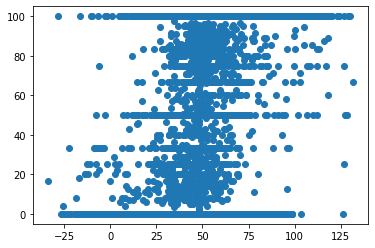

In [24]:
plt.scatter(predy, testy)

In [ ]:
#A classification model seems to be a better fit as we want the model to predict the data into a category. In this case, it would be a win, loss or a draw

In [ ]:
#The second attempt is to perform a RandomForestRegressor

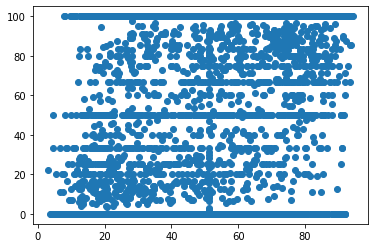

In [9]:
forest = RandomForestRegressor(max_depth=10, criterion='poisson').fit(trainx, trainy)
predy = forest.predict(testx)
plt.scatter(predy, testy)

In [76]:
#Gridsearch is performed to find the best parameters
pipe = Pipeline([('Forest', RandomForestRegressor())])
pipe_params = {
    'Forest__min_samples_split': [2, 4, 8],
    'Forest__min_samples_leaf' : [1, 4, 10],
}

In [77]:
grid_search = GridSearchCV(pipe, param_grid = pipe_params)
grid_search.fit(trainx, trainy)

GridSearchCV(estimator=Pipeline(steps=[('Forest', RandomForestRegressor())]),
             param_grid={'Forest__min_samples_leaf': [1, 4, 10],
                         'Forest__min_samples_split': [2, 4, 8]})

In [82]:
grid_search.best_params_

{'Forest__min_samples_leaf': 4, 'Forest__min_samples_split': 4}

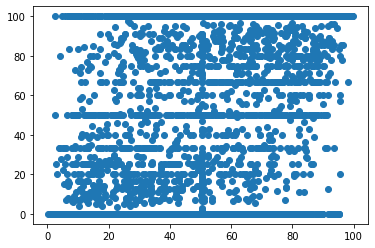

In [14]:
forest = RandomForestRegressor(min_samples_leaf= 4, min_samples_split=4).fit(trainx, trainy)
predy = forest.predict(testx)
plt.scatter(predy, testy)

In [ ]:
#3 Classifications
